# Customer Delivery Time Prediction

## Project Lifecycle
1. Problem Understanding
2. Data Collection
3. Data Quality Checks
4. Exploratory Data Analysis (EDA)
5. Data Pre-processing
6. Model Training
7. Model Selection

## 1. Problem Statement
Predict delivery times for food orders to:
- Improve customer satisfaction
- Optimize delivery operations

## 2. Data Collection

### About the Dataset
Food delivery is a courier service where restaurants, stores, or independent food-delivery companies deliver food to customers. Orders are typically placed through:
- Restaurant websites/apps
- Grocer websites/apps
- Food ordering platforms

### Delivery Details
- **Items Delivered**: Entrees, sides, drinks, desserts, grocery items
- **Packaging**: Boxes or bags
- **Delivery Vehicles**: 
  - Cars (primary)
  - Bikes/motorized scooters (in urban areas)

### Dataset Information
- **Source**: [Kaggle Dataset](https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset?select=train.csv)
- **Size**: 45,593 rows
- **Features**: 20 columns

## 2.1 Import Data and Required Packages


In [347]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic


In [348]:
df = pd.read_csv('data/food_delivery.csv')

In [349]:
df.drop('ID',axis=1,inplace=True)

In [350]:
df.shape

(45593, 19)

In [351]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


## 2.2 Dataset Features

- **Delivery_person_ID**: Unique identifier for each delivery person in the system.
- **Delivery_person_Age**: Age of the delivery person, which may affect delivery performance.
- **Delivery_person_Ratings**: Customer ratings for the delivery person, indicating service quality.
- **Restaurant_latitude**: Geographic latitude coordinate of the restaurant location.
- **Restaurant_longitude**: Geographic longitude coordinate of the restaurant location.
- **Delivery_location_latitude**: Geographic latitude coordinate of the delivery destination.
- **Delivery_location_longitude**: Geographic longitude coordinate of the delivery destination.
- **Order_Date**: Date when the order was placed.
- **Time_Orderd**: Time when the order was placed by the customer.
- **Time_Order_picked**: Time when the delivery person picked up the order from the restaurant.
- **Weatherconditions**: Current weather conditions during delivery (e.g., sunny, rainy, foggy).
- **Road_traffic_density**: Level of traffic congestion on the delivery route.
- **Vehicle_condition**: Condition of the delivery vehicle (scale of 0-2).
- **Type_of_order**: Category of the order (e.g., meal, snack, drinks).
- **Type_of_vehicle**: Vehicle used for delivery (e.g., motorcycle, scooter).
- **multiple_deliveries**: Number of simultaneous deliveries being handled by the delivery person.
- **Festival**: Whether the delivery occurred during a festival period.
- **City**: Type of city area (urban, metropolitan, semi-urban).
- **Time_taken(min)**: Total time taken to complete the delivery in minutes.

## 3. Data Quality Checks

### 3.1 Missing Values Analysis
- Check for null values in each column
- Identify patterns in missing data
- Determine appropriate handling methods

### 3.2 Duplicate Detection
- Identify duplicate records
- Analyze duplicate patterns
- Decide on duplicate handling strategy

In [352]:
df.isna().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

There are no missing values in dataset

In [353]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set


### 3.3 Data Type Verification
- Verify correct data types for each column
- Check for type inconsistencies
- Plan necessary type conversions

In [354]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45593 non-null  object 
 1   Delivery_person_Age          45593 non-null  object 
 2   Delivery_person_Ratings      45593 non-null  object 
 3   Restaurant_latitude          45593 non-null  float64
 4   Restaurant_longitude         45593 non-null  float64
 5   Delivery_location_latitude   45593 non-null  float64
 6   Delivery_location_longitude  45593 non-null  float64
 7   Order_Date                   45593 non-null  object 
 8   Time_Orderd                  45593 non-null  object 
 9   Time_Order_picked            45593 non-null  object 
 10  Weatherconditions            45593 non-null  object 
 11  Road_traffic_density         45593 non-null  object 
 12  Vehicle_condition            45593 non-null  int64  
 13  Type_of_order   

In [355]:
df.isnull().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

As we see above we have bunch of null, Nan values . we will clean them step by step depending columns dataypes

### 3.4 Unique Value Analysis
- Count unique values per column
- Identify categorical variables
- Analyze value distributions

In [356]:
print('Unique Ratings:', df['Delivery_person_Ratings'].unique())
print('Unique Age:', df['Delivery_person_Age'].unique())
print('Unique multiple deliveries: ', df['multiple_deliveries'].unique())
print('Unique cities:', df['City'].unique())
print('Unique Weather info :' , df['Weatherconditions'].unique())
print('Unique Road_traffic_density :' , df['Road_traffic_density'].unique())
print('Unique Festival :' , df['Festival'].unique())
print('Unique Deliveries :' , df['multiple_deliveries'].unique())


Unique Ratings: ['4.9' '4.5' '4.4' '4.7' '4.6' '4.8' '4.2' '4.3' '4' '4.1' '5' '3.5'
 'NaN ' '3.8' '3.9' '3.7' '2.6' '2.5' '3.6' '3.1' '2.7' '1' '3.2' '3.3'
 '6' '3.4' '2.8' '2.9' '3']
Unique Age: ['37' '34' '23' '38' '32' '22' '33' '35' '36' '21' '24' '29' '25' '31'
 '27' '26' '20' 'NaN ' '28' '39' '30' '15' '50']
Unique multiple deliveries:  ['0' '1' '3' 'NaN ' '2']
Unique cities: ['Urban ' 'Metropolitian ' 'Semi-Urban ' 'NaN ']
Unique Weather info : ['conditions Sunny' 'conditions Stormy' 'conditions Sandstorms'
 'conditions Cloudy' 'conditions Fog' 'conditions Windy' 'conditions NaN']
Unique Road_traffic_density : ['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
Unique Festival : ['No ' 'Yes ' 'NaN ']
Unique Deliveries : ['0' '1' '3' 'NaN ' '2']


In [357]:
# Handling missing and invalid ratings:
# - Replace NaN values with the most frequent rating (mode)
# - Convert ratings to float type for numerical operations
mode_ratings = df['Delivery_person_Ratings'].mode()[0]
print(mode_ratings)
df['Delivery_person_Ratings'] =  df['Delivery_person_Ratings'].astype('float64')
df['Delivery_person_Ratings'] =  df['Delivery_person_Ratings'].fillna(mode_ratings)

# - Replace invalid rating (6) with mode value since ratings should be between 1-5

df['Delivery_person_Ratings'] =  df['Delivery_person_Ratings'].replace('6',mode_ratings)
df['Delivery_person_Ratings'].unique()

4.8


array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4.0, 4.1, 5.0, 3.5, '4.8',
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1.0, 3.2, 3.3, 6.0, 3.4,
       2.8, 2.9, 3.0], dtype=object)

In [358]:
# Handling missing age values:
# - Convert string 'NaN' to actual NaN values
# - Convert age column to float type
# - Fill missing values with mean age to maintain data distribution
df['Delivery_person_Age'] = df['Delivery_person_Age'].replace('NaN', np.nan)
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean())

In [359]:
# Handling city data:
# - Replace empty strings and whitespace with NaN
# - Fill missing values with the most frequent city type
# - Standardize city values by replacing  'NaN' entries with mode
df['City'] = df['City'].replace(r'^\s*$', np.nan, regex=True)
df['City'] = df['City'].replace('', np.nan)

city_mode = df['City'].mode()[0]
print(city_mode)
df['City'] = df['City'].fillna(city_mode)

Metropolitian 


In [360]:
df['City'] = df['City'].replace('NaN ','Metropolitian ')
df.City.unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban '], dtype=object)

In [361]:
# Handling multiple deliveries:
# - Replace missing values with the most frequent value
# - Ensure consistent data format
mode_multiple_deliveries = df['multiple_deliveries'].mode()[0]
df['multiple_deliveries'] = df['multiple_deliveries'].replace('NaN ',mode_multiple_deliveries)
df['multiple_deliveries'].unique()

array(['0', '1', '3', '2'], dtype=object)

In [362]:
# Processing weather conditions:
# - Fill missing values with the most common weather condition
# - Remove 'conditions ' prefix for cleaner data
# - Rename column for better readability

df['Weatherconditions']=df['Weatherconditions'].fillna(df['Weatherconditions'].mode()[0])
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions ', '')
df['Weatherconditions'].unique()
df = df.rename(columns={'Weatherconditions': 'Weather_Conditions'})

In [363]:
# Handling festival data:
# - Fill missing values with the most common value ('No')
# - Standardize festival values

festival_mode = df['Festival'].mode()
print(festival_mode)
df['Festival'] = df['Festival'].fillna(festival_mode)
df['Festival'] = df['Festival'].replace('NaN ', 'No ')
df['Festival'].unique()

0    No 
Name: Festival, dtype: object


array(['No ', 'Yes '], dtype=object)

In [364]:
# Processing road traffic density:
# - Fill missing values with the most common traffic condition
# - Standardize traffic density values

print(df['Road_traffic_density'].unique())
df['Road_traffic_density']=df['Road_traffic_density'].fillna(df.Road_traffic_density.mode()[0])
df['Road_traffic_density'] = df['Road_traffic_density'].str.replace('NaN ' , df['Road_traffic_density'].mode()[0])
print(df['Road_traffic_density'].unique())

['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
['High ' 'Jam ' 'Low ' 'Medium ']


In [365]:

# Time data processing:
# - Fill missing order times with the most common time
# - Convert time strings to datetime objects
# - Extract time components for better analysis
df['Time_Orderd']=df['Time_Orderd'].fillna(df.Time_Orderd.mode()[0])
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time

In [366]:
# Time taken datatype change -min deleted 
df['Time_taken(min)'] = df['Time_taken(min)'].str.extract(r'(\d+)').astype('Int64')

In [367]:
# Date processing:
# - Convert order date to datetime format with correct date format
# - Extract day, month, and year components for temporal analysis
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')
df['Order_day'] = df['Order_Date'].dt.day.astype('int64')
df['Order_month'] = df['Order_Date'].dt.month.astype('int64')
df['Order_year'] = df['Order_Date'].dt.year.astype('int64')

In [368]:
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time

In [369]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_day,Order_month,Order_year
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,2,Snack,motorcycle,0,No,Urban,24,19,3,2022
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,2,Snack,scooter,1,No,Metropolitian,33,25,3,2022
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,0,Drinks,motorcycle,1,No,Urban,26,19,3,2022
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,0,Buffet,motorcycle,1,No,Metropolitian,21,5,4,2022
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,1,Snack,scooter,1,No,Metropolitian,30,26,3,2022


In [370]:
# Distance calculation:
# - Calculate delivery distance using geodesic distance
# - Add distance as a new feature for analysis
def distance_calculator(row):
    'It calculates the distance between restaurant and delivery address'
    restaurant_coordinates = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_address_coordinates = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])

    return geodesic(restaurant_coordinates,delivery_address_coordinates).kilometers

df['distance']= df.apply(distance_calculator, axis = 1)

In [371]:
df.describe()

,Delivery_person_Age,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Vehicle_condition,Time_taken(min),Order_day,Order_month,Order_year,distance
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593,45593.000000,45593.0,45593.000000,45593.000000,45593.0,45593.000000
mean,29.567137,17.017729,70.231332,17.465186,70.845702,2022-03-13 16:32:53.987235072,1.023359,26.294607,13.811331,2.980699,2022.0,99.198950
min,15.000000,-30.905562,-88.366217,0.010000,0.010000,2022-02-11 00:00:00,0.000000,10.0,1.000000,2.000000,2022.0,1.463837
25%,25.000000,12.933284,73.170000,12.988453,73.280000,2022-03-04 00:00:00,0.000000,19.0,6.000000,3.000000,2022.0,4.654185
50%,29.567137,18.546947,75.898497,18.633934,76.002574,2022-03-15 00:00:00,1.000000,26.0,13.000000,3.000000,2022.0,9.247024
75%,34.000000,22.728163,78.044095,22.785049,78.107044,2022-03-27 00:00:00,2.000000,32.0,20.000000,3.000000,2022.0,13.740932
max,50.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,3.000000,54.0,31.000000,4.000000,2022.0,19709.575543
std,5.695692,8.185109,22.883647,7.335122,21.118812,NaN,0.839065,9.383806,8.708362,0.545906,0.0,1099.925157


## Key Statistical Insights

### Delivery Person Characteristics
- **Age**: Mean age is 29.57 years (range: 15-50)
- **Vehicle Condition**: Most vehicles are in good condition (mean: 1.02, scale 0-3)

### Delivery Performance
- **Time Taken**: Average delivery time is 26.29 minutes
- **Time Range**: 10-54 minutes (75% of deliveries take ≤32 minutes)

### Geographic Analysis
- **Distance**: 
  - Mean: 99.20 km
  - Median: 9.25 km
  - Maximum outlier: 19,709.58 km (likely data error)
  - 75% of deliveries are within 13.74 km

### Temporal Patterns
- **Order Dates**: February 11 - April 6, 2022
- **Peak Month**: March (75% of orders)
- **Order Days**: Evenly distributed (mean: 13.81 days)

### Data Quality Notes
- Significant outliers in distance measurements
- High standard deviation in distance (1099.93) suggests data anomalies

# EDA

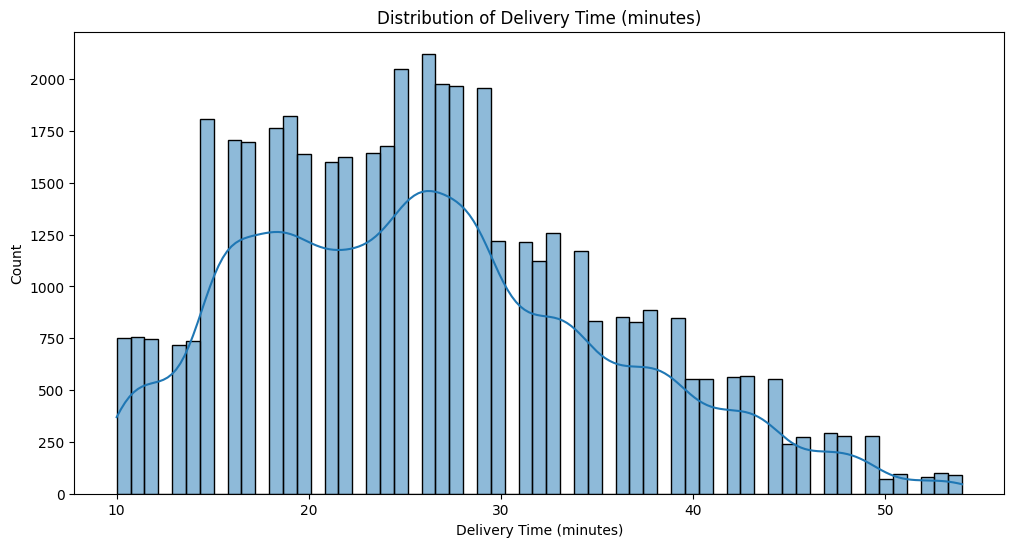

In [372]:
# Distribution of Delivery Time
plt.figure(figsize=(12, 6))
sns.histplot(df['Time_taken(min)'], kde=True)
plt.title('Distribution of Delivery Time (minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Count')
plt.show()

## Distribution of Delivery Time - Key Insights

- **Average Range**: Most deliveries completed in 20-30 minutes
- **Distribution**: Shows normal pattern with slight right skew
- **Outliers**: Few deliveries exceed 45 minutes
- **Business Target**: Optimal delivery window appears to be 20-30 minutes

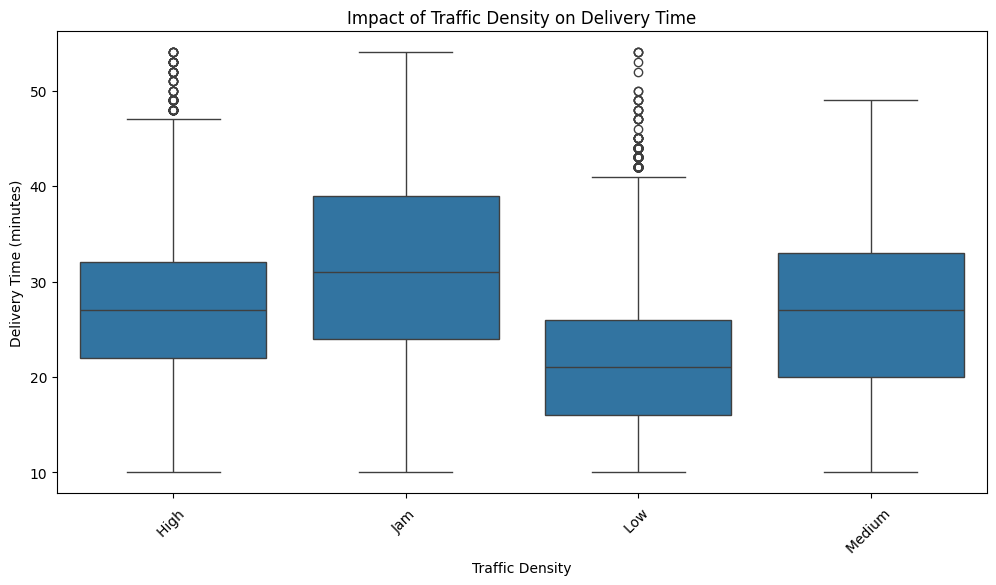

In [373]:
# Impact of Traffic Density on Delivery Time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=df)
plt.title('Impact of Traffic Density on Delivery Time')
plt.xlabel('Traffic Density')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

## Traffic Density Impact on Delivery Time - Summary

- **Jam**: Longest delivery times, median around 40 minutes
- **High Traffic**: Slightly shorter times than jams, median around 30 minutes
- **Medium Traffic**: Similar to high traffic, median around 30 minutes
- **Low Traffic**: Shortest delivery times, median around 25 minutes
- **Outliers**: Present in high and low traffic conditions

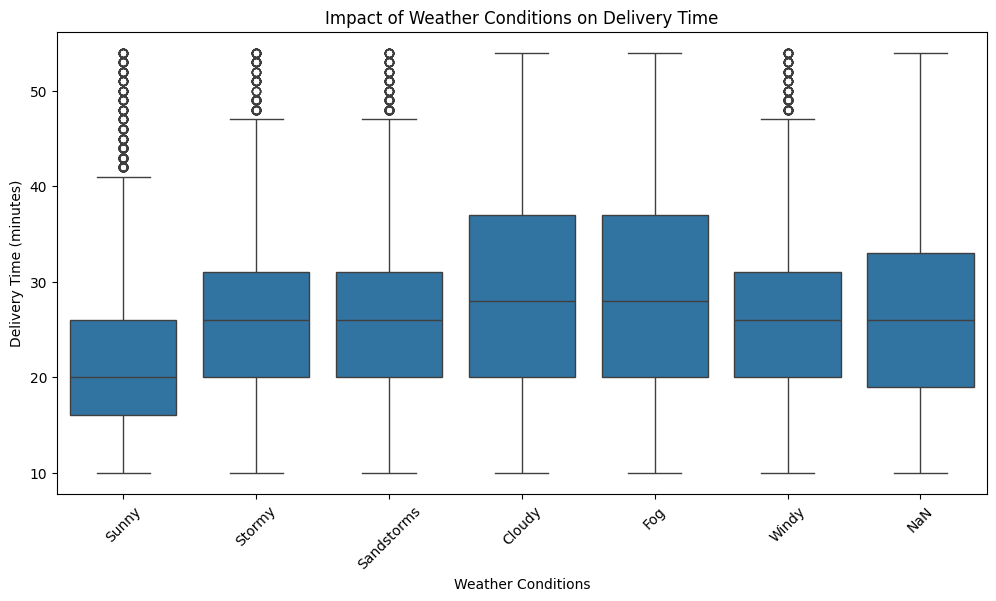

In [374]:
# Impact of Weather on Delivery Time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_Conditions', y='Time_taken(min)', data=df)
plt.title('Impact of Weather Conditions on Delivery Time')
plt.xlabel('Weather Conditions')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

## Weather Conditions Impact on Delivery Time - Summary

- **Sunny**: Shortest delivery times, median around 25 minutes
- **Stormy/Sandstorms**: Longer times, medians around 30 minutes
- **Cloudy/Fog**: Similar to stormy, medians around 30 minutes
- **Windy**: Slightly shorter times, median around 28 minutes
- **Outliers**: Present across all conditions, especially sunny and windy

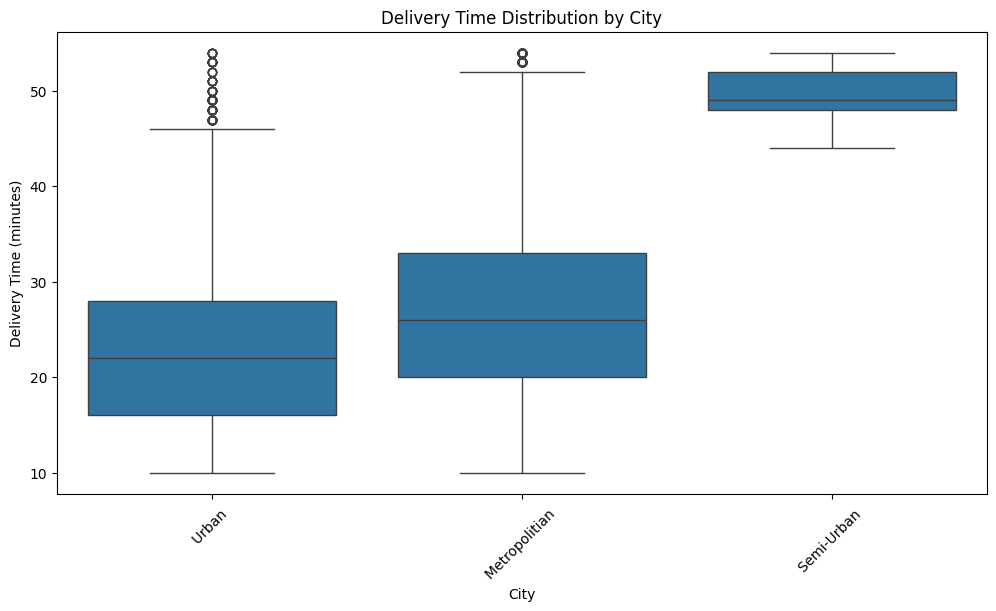

In [375]:
# Delivery Time by City
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Time_taken(min)', data=df)
plt.title('Delivery Time Distribution by City')
plt.xlabel('City')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

## Delivery Time by City - Summary

- **Urban**: Shortest delivery times, median around 25 minutes
- **Metropolitan**: Slightly longer, median around 30 minutes
- **Semi-Urban**: Longest delivery times, median around 50 minutes
- **Outliers**: Present in urban areas, indicating variability

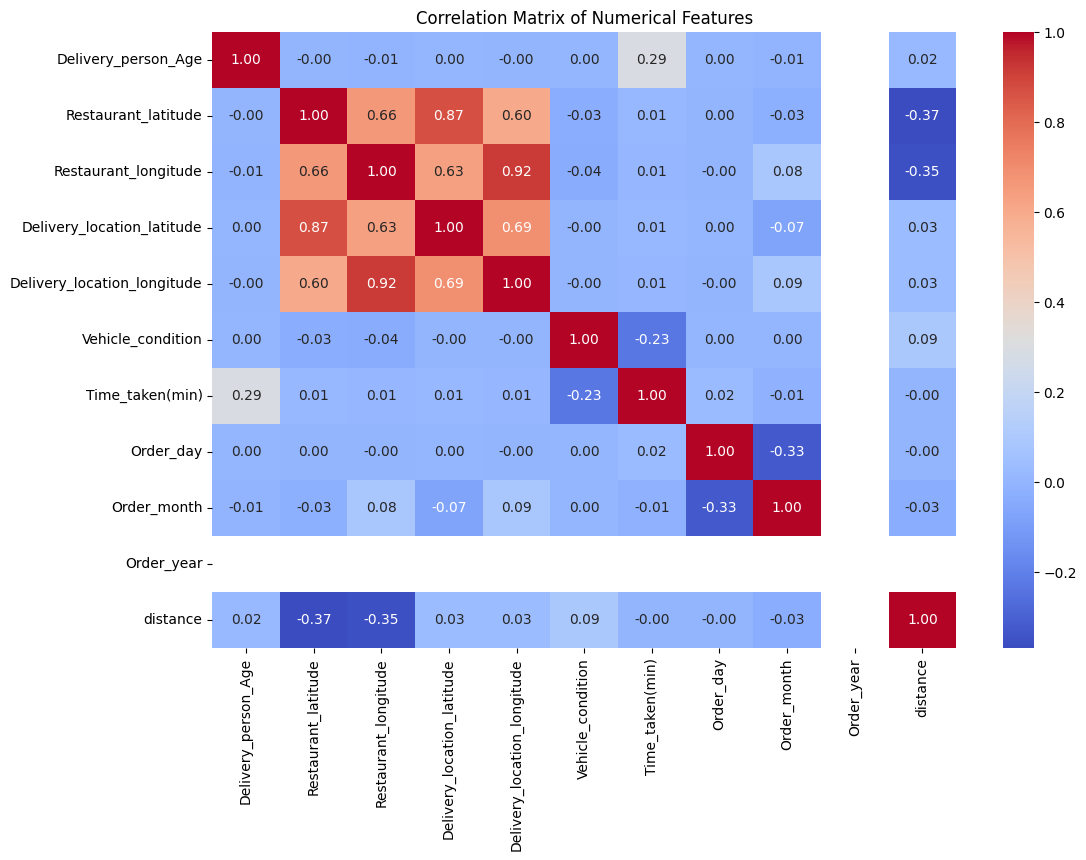

In [376]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Correlation Matrix - Summary

- **Strong Correlations**:
  - Restaurant and delivery location coordinates are highly correlated
  - Restaurant longitude and delivery longitude show strong correlation

- **Moderate Correlations**:
  - Delivery person age has a moderate positive correlation with delivery time

- **Weak Correlations**:
  - Most other features show weak or no correlation with delivery time

- **Insights**:
  - Geographic features are interrelated
  - Age may slightly influence delivery efficiency

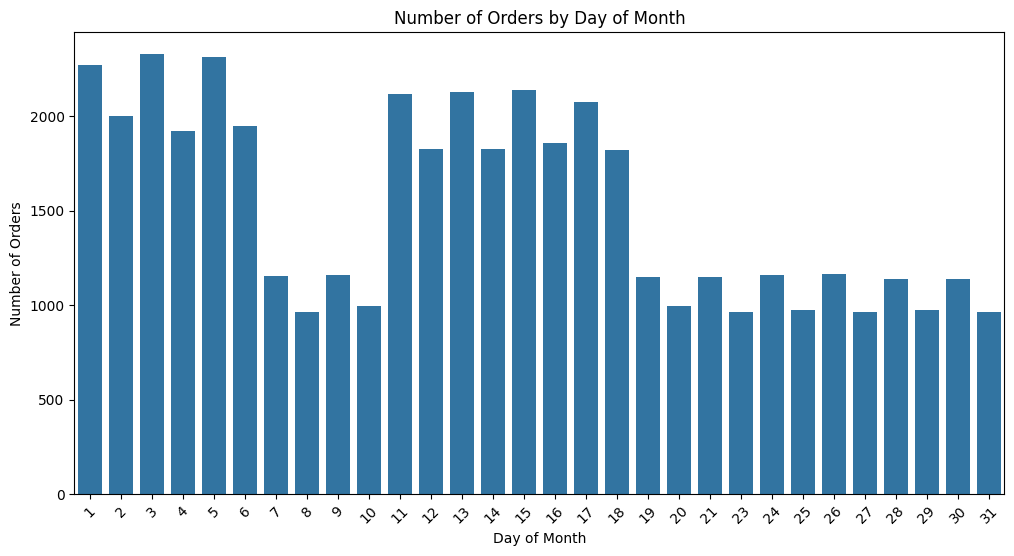

In [377]:
# Daily Order Counts
plt.figure(figsize=(12, 6))
daily_orders = df['Order_day'].value_counts().sort_index()
sns.barplot(x=daily_orders.index, y=daily_orders.values)
plt.title('Number of Orders by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

## Number of Orders by Day of Month - Summary

- **Peak Days**: Early in the month (1st to 5th) show the highest order volumes
- **Mid-Month Dip**: Noticeable decrease in orders around the 10th to 14th
- **End of Month**: Gradual decline in orders towards the end of the month
- **Insights**: Early month promotions or paydays might drive higher order volumes